# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [22]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 設定 data_path
dir_data = 'D:/GitHub/3rd-ML100Days/data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [9]:
app_train['DAYS_BIRTH_gp'] = pd.cut(app_train['DAYS_BIRTH'], 5)

In [20]:
app_train['DAYS_BIRTH_gp'].head()

0    (7471.26, 11037.0]
1    (14585.0, 18133.0]
2    (18133.0, 21681.0]
3    (18133.0, 21681.0]
4    (18133.0, 21681.0]
Name: DAYS_BIRTH_gp, dtype: category
Categories (5, interval[float64]): [(7471.26, 11037.0] < (11037.0, 14585.0] < (14585.0, 18133.0] < (18133.0, 21681.0] < (21681.0, 25229.0]]

In [19]:
app_train.groupby(['DAYS_BIRTH_gp','TARGET']).size()

DAYS_BIRTH_gp       TARGET
(7471.26, 11037.0]  0         41447
                    1          5359
(11037.0, 14585.0]  0         72536
                    1          7652
(14585.0, 18133.0]  0         68941
                    1          5744
(18133.0, 21681.0]  0         62079
                    1          4102
(21681.0, 25229.0]  0         37683
                    1          1968
dtype: int64

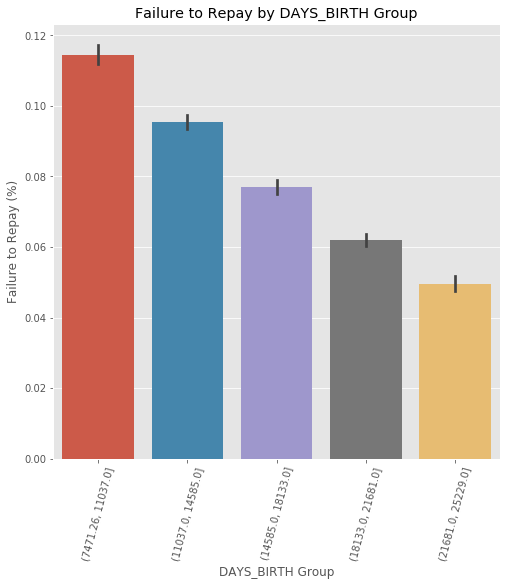

In [23]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['DAYS_BIRTH_gp']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('DAYS_BIRTH Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by DAYS_BIRTH Group');

In [24]:
### BY HW16 ###

# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)

bin_cut =  10
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: YEARS_BINNED, dtype: int64


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.378, 30.238]"
1,0,16765,45.931507,"(44.819, 49.679]"
2,0,19046,52.180822,"(49.679, 54.54]"
3,0,19005,52.068493,"(49.679, 54.54]"
4,0,19932,54.608219,"(54.54, 59.4]"


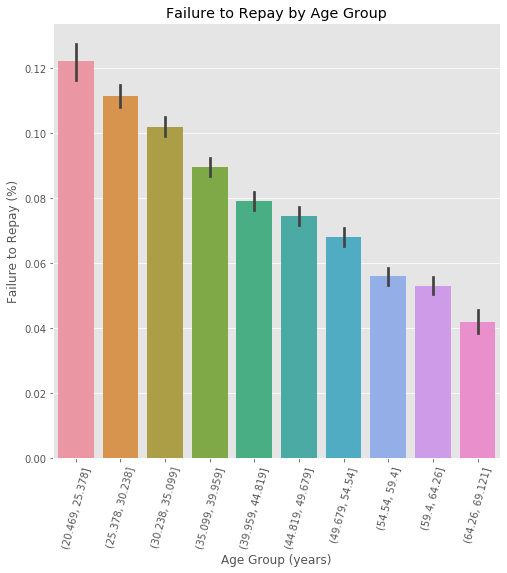

In [25]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [ ]:
#AMT_INCOME_TOTAL

In [30]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
AMT_INCOME_data = app_train[['TARGET', 'AMT_INCOME_TOTAL']] # subset

#自 20 到 70 歲，切 11 個點 (得到 10 組)

bin_cut =  3
AMT_INCOME_data['AMT_INCOME_TOTAL_gp'] = pd.qcut(AMT_INCOME_data['AMT_INCOME_TOTAL'],10) 

# 顯示不同組的數量
print(AMT_INCOME_data['AMT_INCOME_TOTAL_gp'].value_counts())
AMT_INCOME_data['AMT_INCOME_TOTAL_gp'].head()


(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: AMT_INCOME_TOTAL_gp, dtype: int64


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0    (180000.0, 225000.0]
1    (225000.0, 270000.0]
2    (25649.999, 81000.0]
3    (112500.0, 135000.0]
4    (112500.0, 135000.0]
Name: AMT_INCOME_TOTAL_gp, dtype: category
Categories (10, interval[float64]): [(25649.999, 81000.0] < (81000.0, 99000.0] < (99000.0, 112500.0] < (112500.0, 135000.0] ... (162000.0, 180000.0] < (180000.0, 225000.0] < (225000.0, 270000.0] < (270000.0, 117000000.0]]

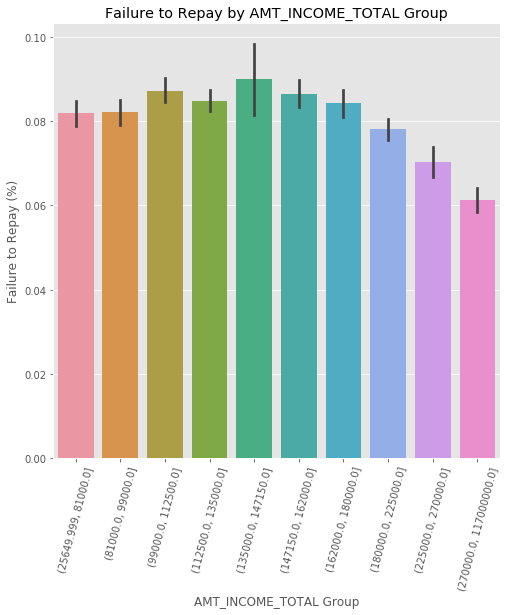

In [31]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = AMT_INCOME_data['AMT_INCOME_TOTAL_gp']
py = AMT_INCOME_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT_INCOME_TOTAL Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by AMT_INCOME_TOTAL Group');